# Techcareer.net Veri Bilimi - Ödev 2

1. Bu ödevde gerçek IoT verisi üzerinde gözetimli öğrenme algoritmalarını test edeceksin. Amaç, verideki değişkenleri analiz ederek odada insan varlığını (occupancy) tespit etmek. 

2. Veriye ilişkin detaylı bilgi için **"Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models"** makalesini okuyabilirsiniz. 

3. Veri içerisindeki ilişkileri görselleştirme yöntemleri ile açıklayın.

4. Parametre listenize en az bir yeni nitelik ekleyin. İki veya daha fazla parametrenin kombinasyonu, birbiriyle çarpımı, toplamı, karesi vs. şeklinde olabilir.

5. Üç adet veri seti mevcut: **Veriseti1:** Kapılar kapalıyken alınmış ölçümler. **Veriseti2:** Kapılar kapalıyken alınmış başka bir veri seti. **Veriseti3:** Kapılar açıkken alınmış ölçümler.

6. Veriseti1 ve Veriseti2 kullanarak oluşturduğunuz modeli Veriseti3 için test edeceksiniz.  

7. Hedef parametreniz Occupancy. İnsan varlığı 1, insan yokluğu 0 değerlerine karşılık geliyor. 

8. Seçeceğiniz model için hyperparametre tuning yapın. Sonuçlarınızın başarısını doğruluk kriterleri ve confusion matrix ile gösterin.

9. Algoritmanızın başarısı **Veriseti3:** üzerindeki sonuçlar ile değerlendirilecektir. 

10. Aşamalarınızı ve yaklaşımlarınız açıklayan, kodunuzun anlaşılmasının kolay olacağı bir notebook hazırlayın. Konuyu bilmeyen bir insanın raporunuza bakarak tekrarlayabileceği şekilde oluşturun. 

In [1]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Veri setlerinin okunması
veriseti1 = pd.read_csv("Veriseti1.txt")
veriseti2 = pd.read_csv("Veriseti2.txt")
veriseti3 = pd.read_csv("Veriseti3.txt")

In [3]:
veriseti1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### Train veri setinin oluşturulması
Modelin veriseti1 ve veriseti2 ile oluşturulması istendiğinden veriseti1 ve veriseti2 birleştirilerek train için kullanılacak veriseti oluşturulmuştur.

In [4]:
train_set = veriseti1.append(veriseti2,ignore_index=True)
train_set

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,1
...,...,...,...,...,...,...,...
10803,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1
10804,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1
10805,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1
10806,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1


In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10808 non-null  object 
 1   Temperature             10808 non-null  float64
 2   Humidity                10808 non-null  float64
 3   Light                   10808 non-null  float64
 4   CO2                     10808 non-null  float64
 5   HumidityRatio           10808 non-null  float64
 6   Occupancy               10808 non-null  int64  
 7   Temperature * Humidity  10808 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 675.6+ KB


In [23]:
veriseti3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    9752 non-null   object 
 1   Temperature             9752 non-null   float64
 2   Humidity                9752 non-null   float64
 3   Light                   9752 non-null   float64
 4   CO2                     9752 non-null   float64
 5   HumidityRatio           9752 non-null   float64
 6   Occupancy               9752 non-null   int64  
 7   Temperature * Humidity  9752 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 685.7+ KB


### Parametre Listesine Yeni Özellik Eklenmesi
Temperature ve Humidity özellikleri çarpılarak Temperature * Humidity özellikliği oluşturulmuştur.

In [5]:
train_set["Temperature * Humidity"] = train_set["Temperature"]*train_set["Humidity"]
train_set.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Temperature * Humidity
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,632.164960
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,631.242625
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,630.721750
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,629.680000
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,628.320000


In [6]:
veriseti3["Temperature * Humidity"] = veriseti3["Temperature"]*veriseti3["Humidity"]
veriseti3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Temperature * Humidity
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,677.461333
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,675.490000
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,677.459019
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,677.459019
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,678.395333


### Pair Plot

<Figure size 900x600 with 0 Axes>

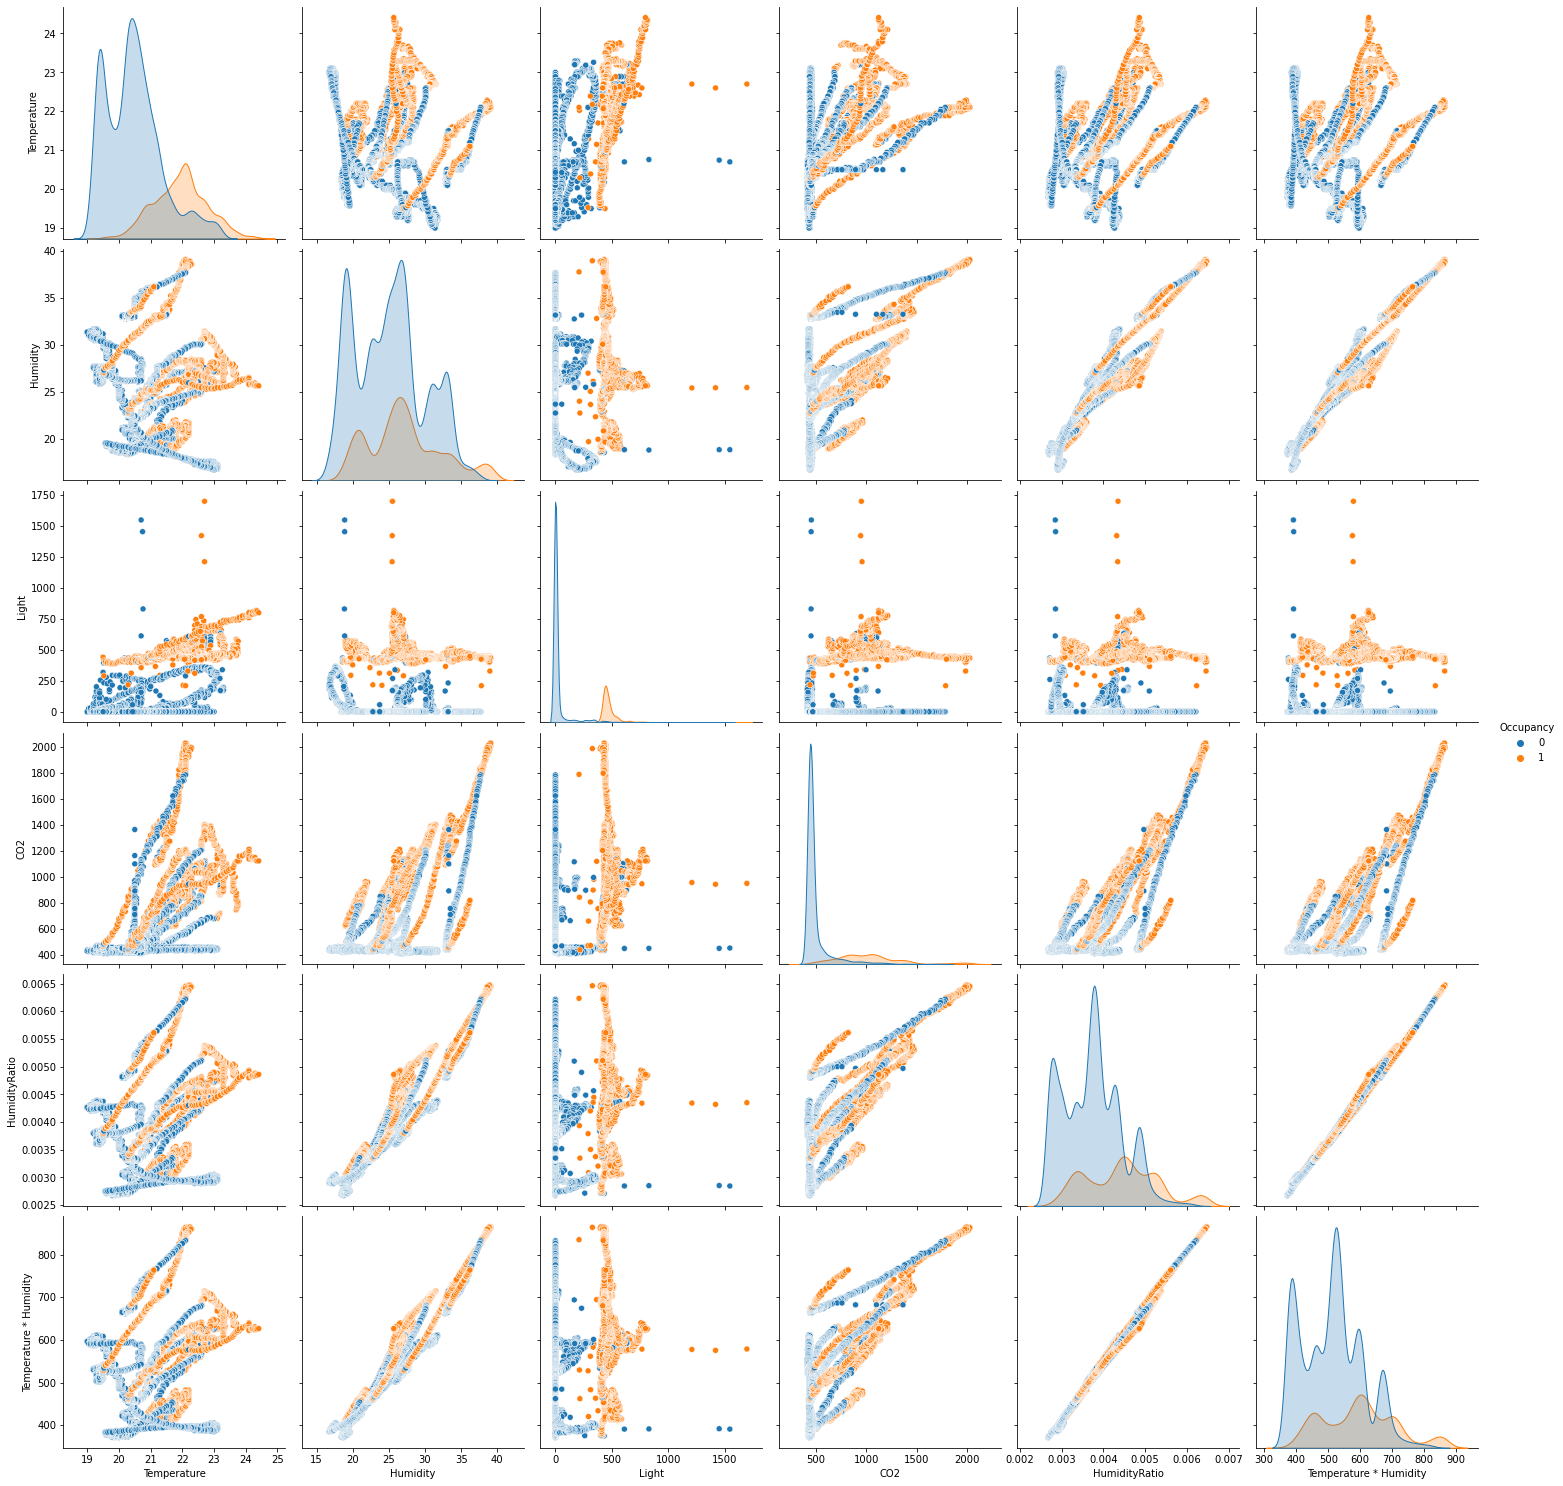

In [7]:
plt.figure(dpi=150)
sns.pairplot(train_set, hue="Occupancy",height=3.5);

### Correlation
Hedef parametreniz Occupancy. Occupacy'nin en yüksek korelasyona sahip olduğunu özelliğin Light olduğunu görüyoruz. Bunu pair plot'taki dağılımda da gözlemleyebiliriz. 

<AxesSubplot:>

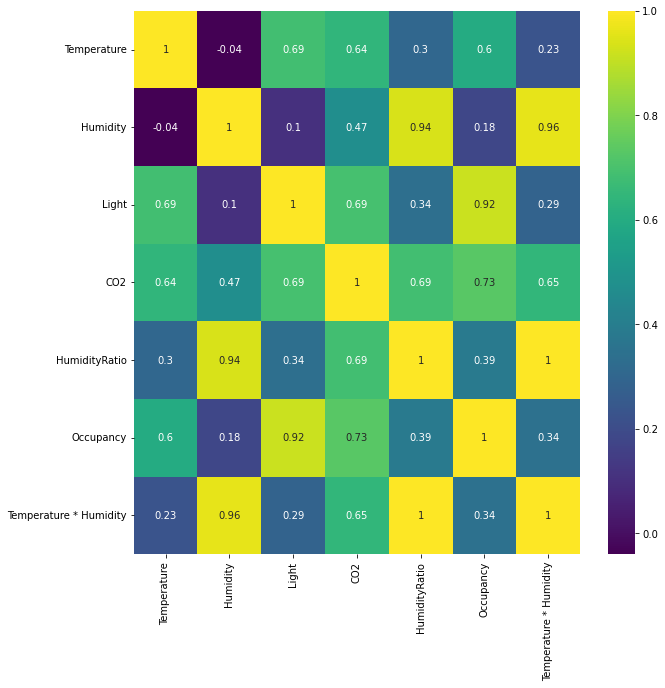

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(), cmap="viridis",annot=True)

### Train ve test veri setlerinin oluşturulması
Algoritmanın başarısı veriseti3 üzerindeki sonuçlardan ölçüleceğinden train_test_split kullanılmadan train_set train veri seti, veriseti3 ise test veri seti olarak kullanılmıştır.

In [9]:
X_train = train_set.drop(columns=["Occupancy","date"]).values
y_train = train_set["Occupancy"].values

X_test = veriseti3.drop(columns=["Occupancy","date"]).values
y_test = veriseti3["Occupancy"].values

### Logistic Regression

In [10]:
lg_sk = LogisticRegression()

# Scaling
sc = StandardScaler().fit(X_train)

# Model training 
lg_sk.fit(X=sc.transform(X_train), y=y_train)

# Prediction
y_predicted = lg_sk.predict(X=sc.transform(X_test))

print(accuracy_score(y_true=y_test, y_pred=y_predicted))

0.9925143560295324


### Decision Tree Classifier


In [11]:
dt = DecisionTreeClassifier(max_depth=2).fit(X=X_train, y=y_train)

# Test the model
y_predicted = dt.predict(X=X_test)

# Accuracy
accuracy_score(y_true=y_test, y_pred=y_predicted)

0.993129614438064

### Random Forest Classifier

In [14]:
# Model
rf = RandomForestClassifier(max_depth=10, n_estimators=20, max_samples=.45, max_features=.7, random_state=42)

# Fit
rf.fit(X=X_train, y=y_train)

# Predict
y_pred = rf.predict(X=X_test)

# Accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9901558654634947

##### GridSearchCV ile Random Forest Classifier

In [15]:
# Model
rf_gs = RandomForestClassifier()

# Set parameters
params_rf = {"max_depth": [5, 10, 50],
             "max_samples": [.4, .5, .6, .7, 1],
             "max_features": [.6, .7, .8, .9, 1],
             "n_estimators": [5, 10, 20]}

grid_rf = GridSearchCV(estimator=rf_gs, param_grid=params_rf, scoring="accuracy", cv=5)
grid_rf.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 50],
                         'max_features': [0.6, 0.7, 0.8, 0.9, 1],
                         'max_samples': [0.4, 0.5, 0.6, 0.7, 1],
                         'n_estimators': [5, 10, 20]},
             scoring='accuracy')

In [16]:
grid_rf.best_params_

{'max_depth': 5, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 10}

In [17]:
# Train üzerinden en iyisini verir
grid_rf.best_score_

0.9793665864597412

In [18]:
best_model = grid_rf.best_estimator_
print(best_model.score(X=X_test, y=y_test))

0.9844134536505332


##### Feature importance

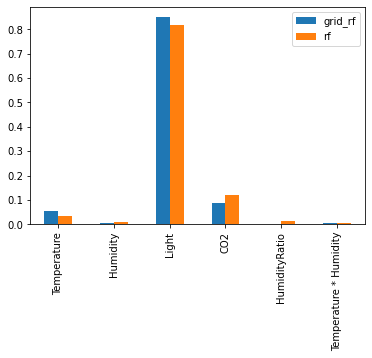

In [19]:
grid_rf_fi = pd.Series(data=best_model.feature_importances_, index=train_set.drop(columns=["Occupancy","date"]).columns)
rf_fi = pd.Series(data=rf.feature_importances_, index=train_set.drop(columns=["Occupancy","date"]).columns)

df = pd.DataFrame({'grid_rf': grid_rf_fi,
                   'rf': rf_fi}, index=train_set.drop(columns=["Occupancy","date"]).columns)
ax = df.plot.bar(rot=90)

##### Confusion Matrix

<AxesSubplot:>

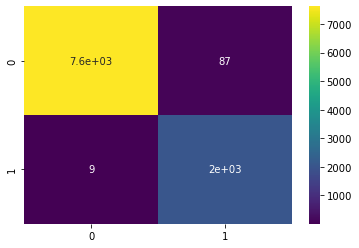

In [20]:
cnfm = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.heatmap(cnfm, annot=True, cmap='viridis')

##### Classification Report

In [21]:
report = classification_report(y_pred=y_pred, y_true=y_test,output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.998820,0.988706,0.993737,7703.000000
1,0.959097,0.995608,0.977011,2049.000000
accuracy,0.990156,0.990156,0.990156,0.990156
macro avg,0.978958,0.992157,0.985374,9752.000000
weighted avg,0.990474,0.990156,0.990223,9752.000000
